In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import MultiModeSystem, plot_full_evolution, SolverOptimizer
import numpy as np
import matplotlib.pyplot as plt

# 3-Mode System

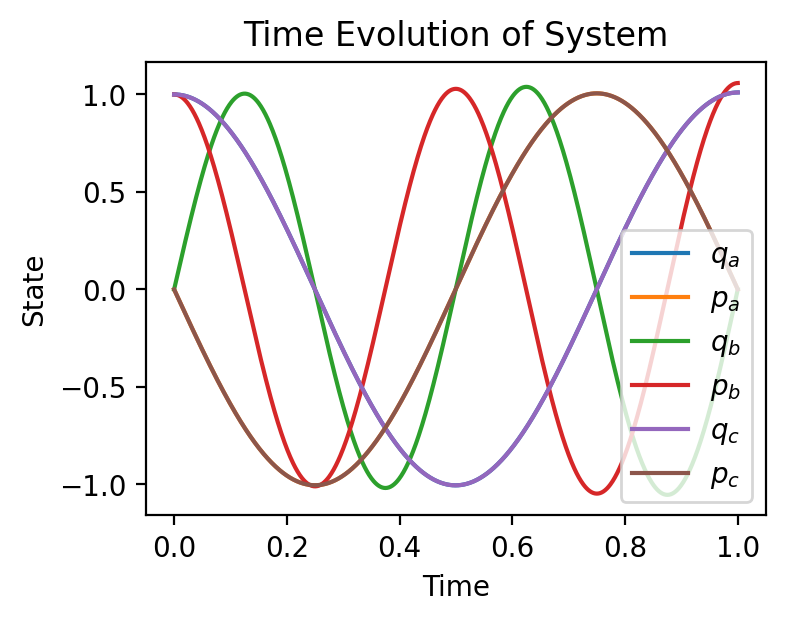

In [35]:
omegas = [2*np.pi*1,2*np.pi*2,2*np.pi*1]
kappas = [2*np.pi*0.001,2*np.pi*0.005,2*np.pi*0.001]
gammas = [2*np.pi*0.002,2*np.pi*0.002,2*np.pi*0.002]
# kerrs = [2*np.pi*0.001, 2*np.pi*0.001, 2*np.pi*0.001]
kerrs = [0,0,0]
couplings = [[0,1,2*np.pi*0.002],[1,2,2*np.pi*0.002]]
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "couplings":couplings, "q":6})

x_0 = np.array([1,0, 0,1, 1,0])
ts = np.linspace(0, 1, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$", "$q_c$","$p_c$"])
ax.legend()

In [36]:
X_linear = sys.forward_euler_linear(x_0, ts, x_0, np.zeros_like(x_0))
X_linear

array([[ 9.99992000e-01,  9.99995142e-01,  9.99958805e-01, ...,
         1.01022952e+00,  1.01031413e+00,  1.01035887e+00],
       [ 1.99690525e-13, -6.28313504e-03, -1.25663885e-02, ...,
         1.28661181e-02,  6.51887387e-03,  1.70990695e-04],
       [ 4.85722573e-17,  1.25661696e-02,  2.51313127e-02, ...,
        -2.67617414e-02, -1.34631835e-02, -1.61462936e-04],
       [ 9.99984001e-01,  9.99936877e-01,  9.99731844e-01, ...,
         1.05819305e+00,  1.05848069e+00,  1.05860120e+00],
       [ 9.99992000e-01,  9.99995142e-01,  9.99958804e-01, ...,
         1.01022952e+00,  1.01031413e+00,  1.01035887e+00],
       [-1.99657565e-13, -6.28313504e-03, -1.25663885e-02, ...,
         1.28661181e-02,  6.51887387e-03,  1.70990695e-04]])

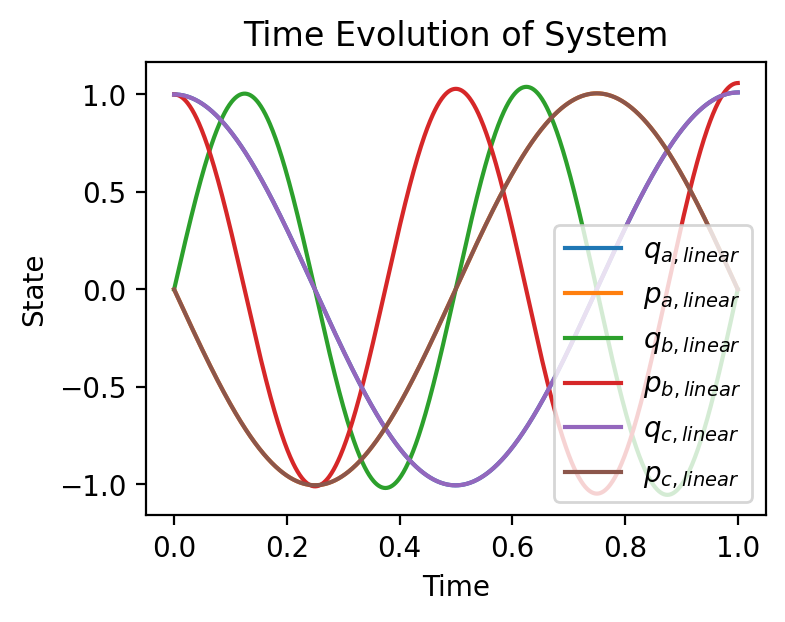

In [37]:
fig, ax = plot_full_evolution(X_linear, ts, labels=["$q_{a,linear}$","$p_{a,linear}$","$q_{b,linear}$","$p_{b,linear}$","$q_{c,linear}$","$p_{c,linear}$"])

/var/folders/kh/nfmc9b4j5w99rvpp01gd8l400000gn/T/ipykernel_80401/1529334329.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Delta_X = (X-X_linear)/X


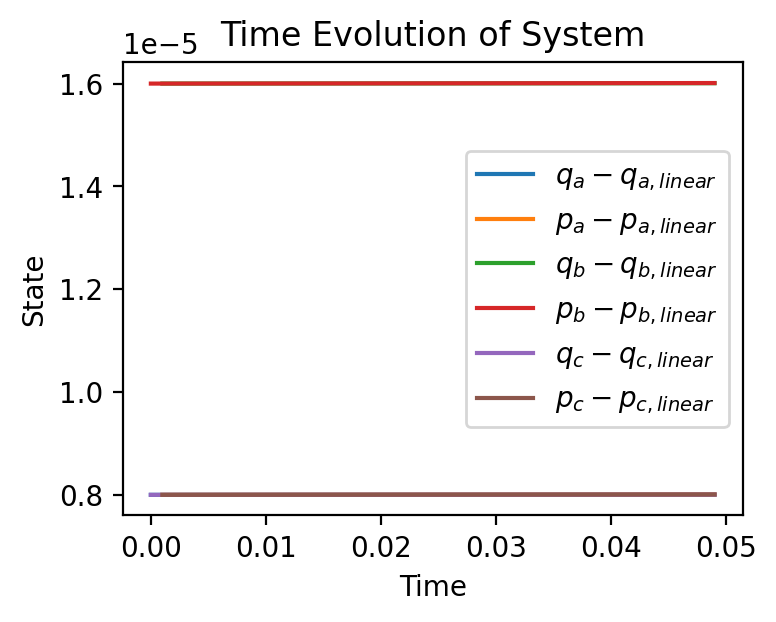

In [38]:
Delta_X = (X-X_linear)/X
plot_full_evolution(Delta_X[:,:50], ts[:50], labels=["$q_a - q_{a,linear}$","$p_a - p_{a,linear}$","$q_b - q_{b,linear}$","$p_b - p_{b,linear}$","$q_c - q_{c,linear}$","$p_c - p_{c,linear}$"])
ax.legend()

# 102-Mode System

In [81]:
# params directly provided

omega_0 = 2*np.pi*1
omega_range = 2*np.pi*np.linspace(0.5,1.5,101)
omegas = [omega_0] + list(omega_range)

num_modes = len(omegas)
kappas = np.zeros(num_modes)
gammas = np.zeros(num_modes)
kerrs = np.zeros(num_modes)

couplings = []
coupling_strength = .1
for i in range(1, num_modes):
    couplings.append([0,i,2*np.pi*coupling_strength])
    
x_0 = np.zeros(num_modes*2)
x_0[0] = 100 # num of photons initially 

ts = np.linspace(0, 20, 100001)

In [82]:
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings, "q":102})
X_linear = sys.forward_euler_linear(x_0, ts, x_0, np.zeros_like(x_0))

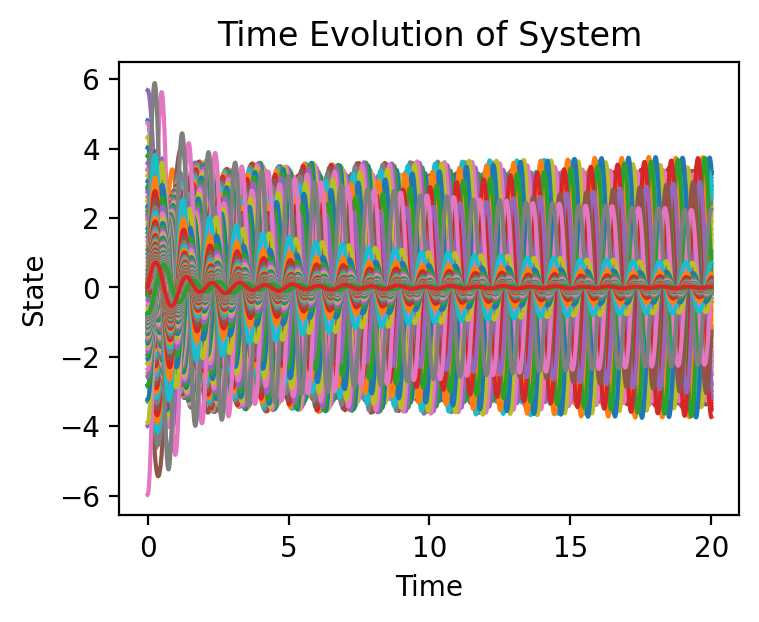

In [84]:
fig, ax = plot_full_evolution(X_linear, ts) # checking that energy does not go to infinity 

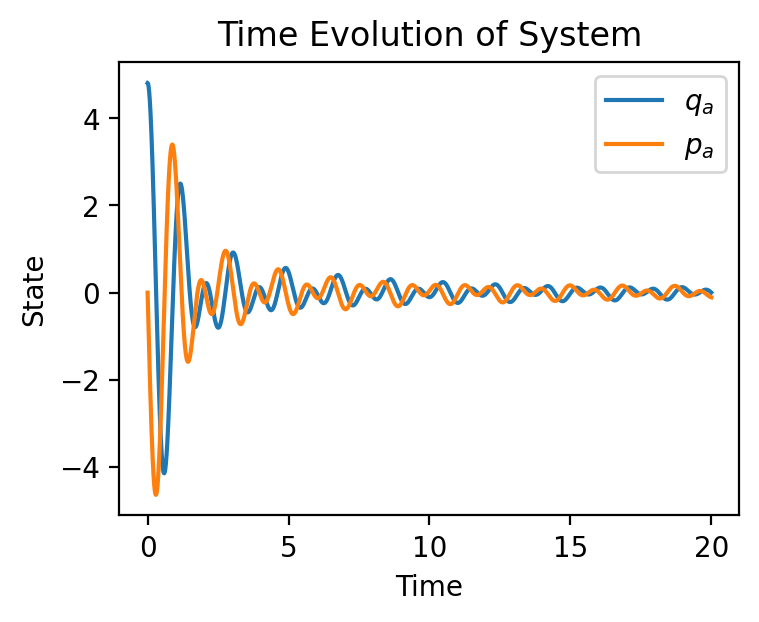

In [85]:
fig, ax = plot_full_evolution(X_linear[:2], ts, labels=["$q_a$","$p_a$"])

In [86]:
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings, "q":50})
X_linear = sys.forward_euler_linear(x_0, ts, x_0, np.zeros_like(x_0))

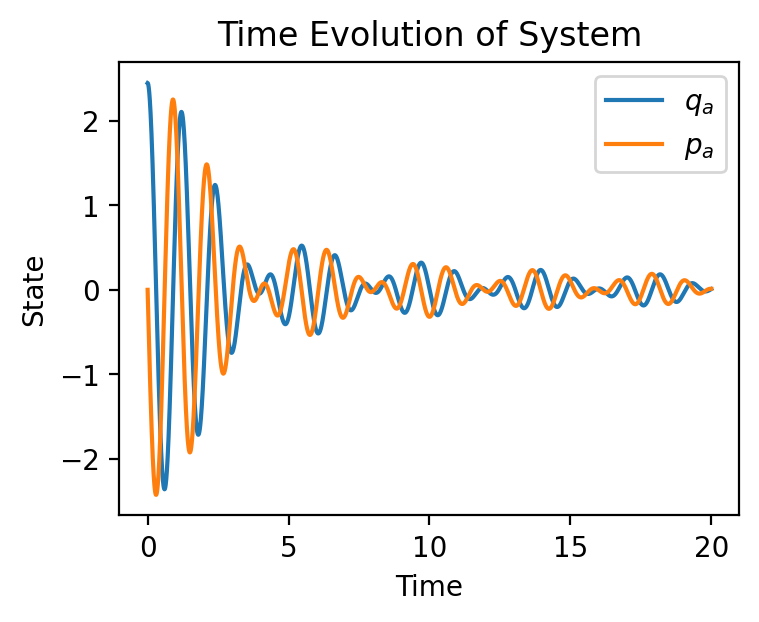

In [87]:
fig, ax = plot_full_evolution(X_linear[:2], ts, labels=["$q_a$","$p_a$"])

In [88]:
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings, "q":20})
X_linear = sys.forward_euler_linear(x_0, ts, x_0, np.zeros_like(x_0))

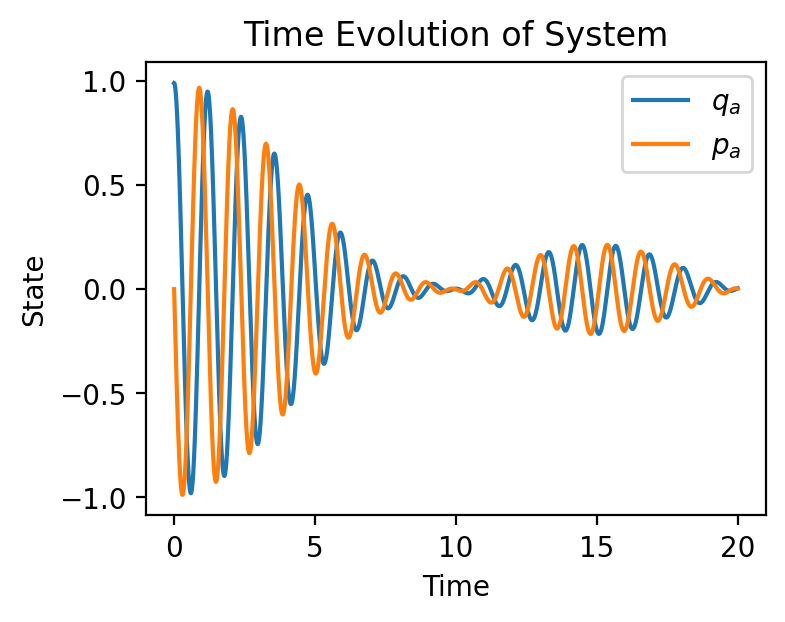

In [89]:
fig, ax = plot_full_evolution(X_linear[:2], ts, labels=["$q_a$","$p_a$"])